In [1]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2 
import matplotlib.pyplot as plt

This is the list of all the files present in the path given to us:

['naganadel.jpg', 'tyrantrum.png', 'bellsprout.png', 'swanna.png', 'chikorita.png', 'nidoqueen.png', 'rapidash.png', 'slugma.png', 'celebi.png', 'ralts.png', 'milotic.png', 'lileep.png', 'nihilego.jpg', 'kyurem.png', 'bunnelby.png', 'yanmega.png', 'kartana.jpg', 'golurk.png', 'shelgon.png', 'regigigas.png', 'emolga.png', 'arceus.png', 'clauncher.png', 'solgaleo.jpg', 'sigilyph.png', 'rowlet.jpg', 'hippowdon.png', 'togekiss.png', 'reuniclus.png', 'vibrava.png', 'lairon.png', 'paras.png', 'magneton.png', 'pidgeotto.png', 'garchomp.png', 'anorith.png', 'manaphy.png', 'noibat.png', 'zygarde-50.png', 'elekid.png', 'magnezone.png', 'rattata.png', 'necrozma.jpg', 'palkia.png', 'ponyta.png', 'houndoom.png', 'mismagius.png', 'marshtomp.png', 'carvanha.png', 'quilava.png', 'grumpig.png', 'lumineon.png', 'tapu-bulu.jpg', 'lampent.png', 'beedrill.png', 'purrloin.png', 'spheal.png', 'seedot.png', 'murkrow.png', 'cranidos.png', 'sla

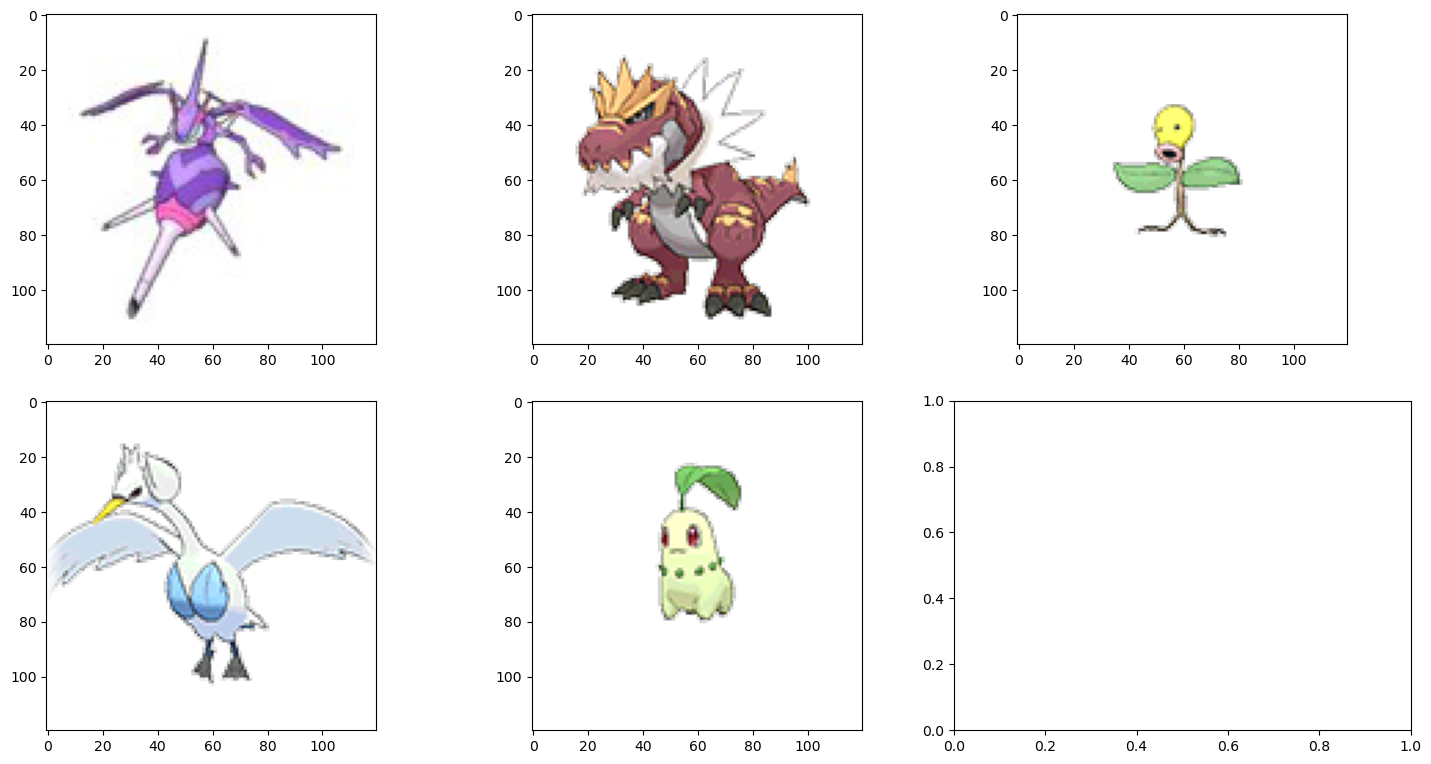

In [3]:
from PIL import Image

root_dir = "images/images"

files =  os.path.join(root_dir)
File_names = os.listdir(files)
print("This is the list of all the files present in the path given to us:\n")
print(File_names)

# plot here
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
first_five = File_names[0:6]

def subplots():
# Use the axes for plotting
    i = 0
    j = 0
    k = 0
    for k in range(5):
        state = os.path.join(root_dir, first_five[k])
        img = Image.open(state)
        axes[i,j].imshow(img)
        
        if k==2:
            i +=1
            j = 0
        else:
            j += 1


    plt.tight_layout(pad=2);
    
subplots()


In [4]:
## Run the below cells as it is
data = pd.read_csv("pokemon.csv")

data.head()

,Name,Type1,Type2
0,bulbasaur,Grass,Poison
1,ivysaur,Grass,Poison
2,venusaur,Grass,Poison
3,charmander,Fire,NaN
4,charmeleon,Fire,NaN


In [5]:
## Run the below cells as it is
data_dict = {}

for key, val in zip(data["Name"], data["Type1"]):
    data_dict[key] = val
print(data_dict)

{'bulbasaur': 'Grass', 'ivysaur': 'Grass', 'venusaur': 'Grass', 'charmander': 'Fire', 'charmeleon': 'Fire', 'charizard': 'Fire', 'squirtle': 'Water', 'wartortle': 'Water', 'blastoise': 'Water', 'caterpie': 'Bug', 'metapod': 'Bug', 'butterfree': 'Bug', 'weedle': 'Bug', 'kakuna': 'Bug', 'beedrill': 'Bug', 'pidgey': 'Normal', 'pidgeotto': 'Normal', 'pidgeot': 'Normal', 'rattata': 'Normal', 'raticate': 'Normal', 'spearow': 'Normal', 'fearow': 'Normal', 'ekans': 'Poison', 'arbok': 'Poison', 'pikachu': 'Electric', 'raichu': 'Electric', 'sandshrew': 'Ground', 'sandslash': 'Ground', 'nidoran-f': 'Poison', 'nidorina': 'Poison', 'nidoqueen': 'Poison', 'nidoran-m': 'Poison', 'nidorino': 'Poison', 'nidoking': 'Poison', 'clefairy': 'Fairy', 'clefable': 'Fairy', 'vulpix': 'Fire', 'ninetales': 'Fire', 'jigglypuff': 'Normal', 'wigglytuff': 'Normal', 'zubat': 'Poison', 'golbat': 'Poison', 'oddish': 'Grass', 'gloom': 'Grass', 'vileplume': 'Grass', 'paras': 'Bug', 'parasect': 'Bug', 'venonat': 'Bug', 've

In [6]:
labels = data["Type1"].unique()
print(labels)

['Grass' 'Fire' 'Water' 'Bug' 'Normal' 'Poison' 'Electric' 'Ground'
 'Fairy' 'Fighting' 'Psychic' 'Rock' 'Ghost' 'Ice' 'Dragon' 'Dark' 'Steel'
 'Flying']


In [7]:
ids = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
labels_idx = dict(zip(labels,ids))

print(labels_idx)

{'Grass': 0, 'Fire': 1, 'Water': 2, 'Bug': 3, 'Normal': 4, 'Poison': 5, 'Electric': 6, 'Ground': 7, 'Fairy': 8, 'Fighting': 9, 'Psychic': 10, 'Rock': 11, 'Ghost': 12, 'Ice': 13, 'Dragon': 14, 'Dark': 15, 'Steel': 16, 'Flying': 17}


In [8]:
final_images = []
final_labels = []
count = 0
files =  os.path.join(root_dir)
for file in File_names:
    count += 1
    img = cv2.imread(os.path.join(root_dir, file), cv2.COLOR_BGR2GRAY) 
    label = labels_idx[data_dict[file.split(".")[0]]] 
    # append img in final_images list
    final_images.append(np.array(img))
    # append label in final_labels list
    final_labels.append(np.array(label))
    
    
# converting lists into numpy arrayn
# normalizing and reshaping the data 
final_images = np.array(final_images, dtype = np.float32)/255.0
final_labels = np.array(final_labels, dtype = np.int8).reshape(809, 1)

In [10]:
!pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/93/c0/a774286d0383419f558deb27096e5de9f9facd6c27df8e9f9af6fba2f77e/tensorflow-2.15.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/01/e4/dc0a1dcc4e74e08d7abedab278c795eef54a224363bb18f5692f416d834f/absl_py-2.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe845d58a913197bfa02ae9a0b5c9bc3dc4b58d477b9e7/flatbuffers-23.5.26-py2.py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 31.6 kB/s eta 0:00:0031m35.2 kB/s eta 0:00:01
  Obtaining dependency information for libclang>=13.0.0 from https://files.pythonhosted.org/packages/ea/df/55525e489c43f9dbb6c8ea27d8a567b3dcd18a22f3c45483055f5ca6611d/libclang-16.0.6-py2.py3-none-manylinux2010_x86_64.w